In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('supermarket_sales.csv')
df

,Invoice ID,Branch,CustomerID,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Longitude,Latitude
0,750-67-8428,A,C1888,Yangon,Member,Female,Health and beauty,74.69,10,37.3450,746.90,21-02-2019,13:08,Ewallet,711.333333,4.761905,35.566667,9.10,96.1735,16.8409
1,226-31-3081,C,C1475,Naypyitaw,Normal,Female,Health and beauty,15.28,6,4.5840,91.68,27-05-2019,10:29,Cash,76.400000,4.761905,15.280000,10.00,96.0785,19.7633
2,631-41-3108,A,C1746,Yangon,Normal,Male,Health and beauty,46.33,7,16.2155,324.31,27-12-2019,13:23,Credit card,324.310000,4.761905,0.000000,7.40,96.1735,16.8409
3,123-19-1176,A,C1896,Yangon,Member,Male,Health and beauty,58.22,11,32.0210,640.42,15-11-2019,20:33,Ewallet,465.760000,4.761905,174.660000,8.40,96.1735,16.8409
4,373-73-7910,A,C1790,Yangon,Normal,Male,Health and beauty,86.31,7,30.2085,604.17,31-03-2019,10:37,Ewallet,604.170000,4.761905,0.000000,NaN,96.1735,16.8409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,C1451,Naypyitaw,Normal,Male,Fashion accessories,40.35,1,2.0175,40.35,02-10-2019,13:46,Ewallet,40.350000,4.761905,0.000000,6.51,96.0785,19.7633
996,303-96-2227,B,C1204,Mandalay,Normal,Female,Fashion accessories,97.38,14,68.1660,1363.32,29-12-2019,17:16,Ewallet,973.800000,4.761905,389.520000,5.28,96.0891,21.9588
997,727-02-1313,A,C1678,Yangon,Member,Male,Fashion accessories,31.84,1,1.5920,31.84,16-01-2019,13:22,Cash,31.840000,4.761905,0.000000,7.70,96.1735,16.8409
998,347-56-2442,A,C1661,Yangon,Normal,Male,Fashion accessories,65.82,1,3.2910,65.82,21-03-2019,15:33,Cash,65.820000,4.761905,0.000000,4.10,96.1735,16.8409


### What is the percentage of sales from members compared to non-members?

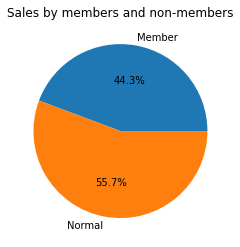

In [18]:
volume_by_members = df.groupby('Customer type')['Quantity'].sum()
plt.pie(volume_by_members.values, labels=volume_by_members.index, autopct='%1.1f%%')
plt.title('Sales by members and non-members')
plt.show()

### Spending patterns bewteen members and non-members

Product line   Electronic accessories  Fashion accessories  \
Customer type                                                
Normal                             58                  112   
Member                             25                   76   

Product line   Food and beverages  Health and beauty  Home and lifestyle  \
Customer type                                                              
Normal                         56                180                  61   
Member                         31                 83                  40   

Product line   Sports and travel  
Customer type                     
Normal                       136  
Member                        71  


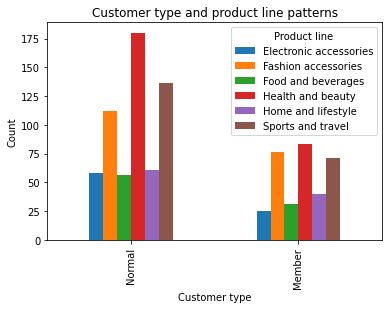

In [20]:
counts = df.groupby(['Customer type', 'Product line']).size().unstack(fill_value=0)
totals = counts.sum(axis=1)
sorted_counts = counts.loc[totals.sort_values(ascending=False).index]
print(sorted_counts)
sorted_counts.plot(kind='bar')
plt.xlabel('Customer type')
plt.ylabel('Count')
plt.title('Customer type and product line patterns')
plt.show()

### Relationship between customer type and payment method

In [7]:
newdata1 = df.loc[(df['Customer type'] == 'Member')]
count_eWallet = newdata1['Payment'].str.contains('Ewallet', case=False).sum()
print("Ewallet was used in {} sales".format(count_eWallet))

count_cash = newdata1['Payment'].str.contains('Cash', case=False).sum()
print("Cash was used  in {} sales".format(count_cash))

count_card = newdata1['Payment'].str.contains('Credit card', case=False).sum()
print("Credit cards were used in {} sales".format(count_card))

Ewallet was used in 102 sales
Cash was used  in 115 sales
Credit cards were used in 119 sales


In [10]:
newdata2 = df.loc[(df['Customer type'] == 'Normal')]
count_eWallet = newdata2['Payment'].str.contains('Ewallet', case=False).sum()
print("Ewallet was used in {} sales".format(count_eWallet))

count_cash = newdata2['Payment'].str.contains('Cash', case=False).sum()
print("Cash was used  in {} sales".format(count_cash))

count_card = newdata2['Payment'].str.contains('Credit card', case=False).sum()
print("Credit cards were used in {} sales".format(count_card))


Ewallet was used in 226 sales
Cash was used  in 204 sales
Credit cards were used in 173 sales
